In [10]:
import pandas as pd
import numpy as np

from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Evaluation Metrics

Pada kasus Ecommerce churn prediction ini, kami menggunakan **Recall** sebagai metrics utama karena tujuan utama dari prediksi model ini adalah mencegah customer untuk churn jika ia terdeteksi churn, maka dari itu dengan metrics recall prediksi kami dapat berfokus sebanyak-banyaknya customer yang berpotensi untuk churn untuk mencegah mereka untuk churn.

Customer yang diprediksi akan churn akan diberikan kupon atau penawaran spesial agar mereka tidak churn, namun karena dataset ini mempunyai target yang imbalance, untuk mencegah memberikan terlalu banyak kupon kepada customer yang tidak berpotensi churn maka kami akan memakai metrics **ROC_AUC** sebagai tambahan.

# Read Dataset

In [11]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 40F4-F4CD

 Directory of C:\Users\DELL\Documents\Bryan\Rakamin\Intellegend-Final-Project

21/02/2022  18:40    <DIR>          .
21/02/2022  18:40    <DIR>          ..
14/02/2022  00:27                66 .gitattributes
21/02/2022  18:27    <DIR>          .ipynb_checkpoints
18/02/2022  22:31    <DIR>          catboost_info
17/02/2022  17:18            95.545 df_test.csv
21/02/2022  18:41           279.065 df_test_2.csv
17/02/2022  17:18           365.331 df_train.csv
21/02/2022  18:41         1.079.863 df_train_2.csv
26/01/2021  10:20           555.610 E Commerce Dataset.xlsx
14/02/2022  01:55    <DIR>          Guidance
18/02/2022  23:28         7.662.688 Laporan Final Project - Ghoib CC.pptx
20/02/2022  23:43         7.692.739 Laporan Final Project - Stage 3.pptx
27/01/2022  18:35         7.844.126 Pandas Profiling.html
20/02/2022  23:47             4.692 README.md
06/02/2022  19:21         1.928.073 Stage 0 - Notulen Mentoring.p

In [12]:
df_train = pd.read_csv('df_train_2.csv')
df_test = pd.read_csv('df_test_2.csv')

In [13]:
df_train.isna().sum()

Tenure                                   0
PreferredLoginDevice                     0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrderCat_Mobile                  0
PreferedOrd

In [14]:
df_train.head()

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0  0.083451                   0.0       0.0         0.500134     1.0   
1  0.749564                   0.0       0.0         0.541002     1.0   
2  0.000000                   0.0       0.0         0.346835     0.0   
3  0.536924                   1.0       0.0         0.281064     0.0   
4  0.327233                   0.0       0.0         0.454840     0.0   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0        0.515888                  0.535825           0.764137   
1        0.760605                  0.759556           0.521245   
2        0.515888                  0.535825           0.521245   
3        0.263824                  0.331418           0.268562   
4        0.263824                  0.331418           0.268562   

   NumberOfAddress  Complain  ...  PreferedOrderCat_Fashion  \
0         0.446283       1.0  ...                       0.0   
1         0.446283       1.0  ...                       0.0   
2         0.279288       0.0  ...                       0.0   
3         0.279288       1.0  ...                       0.0   
4         0.000000       1.0  ...                       0.0   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                       0.0                                  0.0   
1                       0.0                                  1.0   
2                       0.0                                  0.0   
3                       0.0                                  0.0   
4                       0.0                                  0.0   

   PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                      0.0                            1.0   
1                      0.0                            0.0   
2                      1.0                            0.0   
3                      0.0                            1.0   
4                      0.0                            1.0   

   PreferedOrderCat_Others  MaritalStatus_Divorced  MaritalStatus_Married  \
0                      0.0                     0.0                    0.0   
1                      0.0                     0.0                    0.0   
2                      0.0                     0.0                    0.0   
3                      0.0                     1.0                    0.0   
4                      0.0                     1.0                    0.0   

   MaritalStatus_Single  Churn  
0                   1.0      0  
1                   1.0      0  
2                   1.0      0  
3                   0.0      0  
4                   0.0      0  

[5 rows x 29 columns]

In [15]:
X_train = df_train.drop('Churn', axis = 1)
y_train = df_train['Churn']
X_test = df_test.drop('Churn', axis = 1)
y_test = df_test['Churn']

# Baseline Model

In [16]:
X_train

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0     0.083451                   0.0       0.0         0.500134     1.0   
1     0.749564                   0.0       0.0         0.541002     1.0   
2     0.000000                   0.0       0.0         0.346835     0.0   
3     0.536924                   1.0       0.0         0.281064     0.0   
4     0.327233                   0.0       0.0         0.454840     0.0   
...        ...                   ...       ...              ...     ...   
4324  0.083451                   0.0       0.0         0.881135     0.0   
4325  0.568900                   0.0       1.0         0.643553     0.0   
4326  0.465338                   0.0       0.0         0.454840     1.0   
4327  0.083451                   0.0       0.0         1.000000     0.0   
4328  0.000000                   0.0       0.0         0.896602     0.0   

      HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0           0.515888                  0.535825           0.764137   
1           0.760605                  0.759556           0.521245   
2           0.515888                  0.535825           0.521245   
3           0.263824                  0.331418           0.268562   
4           0.263824                  0.331418           0.268562   
...              ...                       ...                ...   
4324        0.760605                  0.535825           0.521245   
4325        0.515888                  0.535825           0.000000   
4326        0.515888                  0.759556           0.764137   
4327        0.760605                  0.535825           1.000000   
4328        0.515888                  0.331418           0.521245   

      NumberOfAddress  Complain  ...  PreferredPaymentMode_UPI  \
0            0.446283       1.0  ...                       0.0   
1            0.446283       1.0  ...                       0.0   
2            0.279288       0.0  ...                       0.0   
3            0.279288       1.0  ...                       0.0   
4            0.000000       1.0  ...                       0.0   
...               ...       ...  ...                       ...   
4324         0.279288       0.0  ...                       0.0   
4325         0.738103       0.0  ...                       0.0   
4326         0.958397       0.0  ...                       0.0   
4327         0.446283       0.0  ...                       0.0   
4328         0.279288       1.0  ...                       0.0   

      PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
4324                       0.0                       0.0   
4325                       1.0                       0.0   
4326                       0.0                       0.0   
4327                       0.0                       0.0   
4328                       0.0                       0.0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                     0.0                      0.0   
1                                     1.0                      0.0   
2                                     0.0                      1.0   
3                                     0.0                      0.0   
4                                     0.0                      0.0   
...                                   ...                      ...   
4324                                  1.0                      0.0   
4325                                  0.0                      0.0   
4326                                  0.0                      0.0   
4327                                  0.0                      0

In [17]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4324    0
4325    1
4326    0
4327    0
4328    1
Name: Churn, Length: 4329, dtype: int64

In [18]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [19]:
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Recall Score = 0.651685393258427
ROC_AUC Score = 0.810287141073658


In [20]:
LRP = { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    }

In [21]:
LR = LogisticRegression()
GSCV = GridSearchCV(LR, LRP, cv = 5, n_jobs = -1, verbose = 0, scoring = 'recall')
GSCV.fit(X_train, y_train)
y_pred = GSCV.predict(X_test)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Recall Score = 0.651685393258427
ROC_AUC Score = 0.8080649188514357


In [22]:
y_pred_train = GSCV.predict(X_train)
print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')

Recall Score = 0.5624161073825503
ROC_AUC Score = 0.7608397501198465


Jika dilihat dari model baseline, model tersebut adalah model yang undertrain. karena itu kita perlu menaikkan variance dari model dengan menggunakan model-model boosting. Namun model-model lain akan tetap dicoba untuk menguji performa mereka

In [23]:
models = [DecisionTreeClassifier(),
          KNeighborsClassifier(),
          SVC(),
         RandomForestClassifier(random_state = 42),
         GradientBoostingClassifier(),
         XGBClassifier(random_state = 42, use_label_encoder=False),
         AdaBoostClassifier(random_state = 42),
         CatBoostClassifier(random_state = 42, verbose = False)]
names = ['Decision Tree',
         'KNN',
         'SVM',
       'Random Forest',
       'Gradient Boosting',
       'XGBoost',
       'AdaBoost',
       'CatBoost']

In [24]:
def plusNone(arr):
    return np.array(arr.tolist() + [None])

In [25]:
params = [
    { # Decision Tree
        'max_depth': plusNone(np.linspace(1, 32, 32, endpoint=True)),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': plusNone(np.array(range(1,X_train.shape[1])))
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    {# SVC
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }, 
    {#Random Forest
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    {# Gradient Boosting
        "n_estimators":[5,50,250,500],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1,10,100]
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    {# Catboost
        'max_depth': [3,4,5],
        'n_estimators':[100, 200, 300]
    }
]

# Before Hyperparameter Tuning

In [26]:
def model_score(model, name):
    print(f'{name}:')
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print('\n')

In [27]:
for i in range(len(models)):
    model_score(models[i], names[i])

Decision Tree:
Recall Score = 0.848314606741573
ROC_AUC Score = 0.894712858926342


KNN:
Recall Score = 0.47191011235955055
ROC_AUC Score = 0.7181772784019975


SVM:
Recall Score = 0.6629213483146067
ROC_AUC Score = 0.8247940074906367


Random Forest:
Recall Score = 0.8202247191011236
ROC_AUC Score = 0.907334581772784


Gradient Boosting:
Recall Score = 0.6797752808988764
ROC_AUC Score = 0.8287765293383271


XGBoost:
[18:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall Score = 0.8876404494382022
ROC_AUC Score = 0.9360424469413233


AdaBoost:
Recall Score = 0.651685393258427
ROC_AUC Score = 0.8075093632958802


CatBoost:
Recall Score = 0.8146067415730337
ROC_AUC Score = 0.9000811485642946




# After Hyperparameter Tuning

In [28]:
def model_score_tune_rscv(model, name, params, n_iter = 10):
    print(f'{name}:')
    RSCV = RandomizedSearchCV(model, params, cv = 3, n_jobs = -1, verbose = 0, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = n_iter)
    RSCV.fit(X_train, y_train)
    y_pred = RSCV.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(RSCV.best_params_)
    print('\n')

In [29]:
def model_score_tune_gscv(model, name, params):
    print(f'{name}:')
    GSCV = GridSearchCV(model, params, cv = 3, n_jobs = -1, verbose = 0, scoring = 'recall')
    GSCV.fit(X_train, y_train)
    y_pred = GSCV.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(GSCV.best_params_)
    print('\n')

In [32]:
for i in range(0,3):
    model_score_tune_gscv(models[i], names[i], params[i])

Decision Tree:
Recall Score = 0.0
ROC_AUC Score = 0.5
{'max_depth': 9.0, 'max_features': 4, 'min_samples_leaf': 0.1, 'min_samples_split': 0.30000000000000004}


KNN:


KeyboardInterrupt: 

In [ ]:
model_score_tune_rscv(models[3], names[3], params[3], 100)

In [ ]:
model_score_tune_gscv(models[4], names[4], params[4])

In [33]:
for i in range(len(models)):
    model_score_tune_rscv(models[i], names[i], params[i], 100)

Decision Tree:
Recall Score = 0.0
ROC_AUC Score = 0.5
{'min_samples_split': 0.6, 'min_samples_leaf': 0.2, 'max_features': 14, 'max_depth': 5.0}


KNN:
Recall Score = 0.797752808988764
ROC_AUC Score = 0.8816541822721597
{'p': 2, 'n_neighbors': 1, 'leaf_size': 11, 'algorithm': 'kd_tree'}


SVM:
Recall Score = 0.898876404494382
ROC_AUC Score = 0.8849937578027466
{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}


Random Forest:
Recall Score = 0.8876404494382022
ROC_AUC Score = 0.9399313358302123
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


Gradient Boosting:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'n_estimators': 5, 'max_depth': 1, 'learning_rate': 100}


XGBoost:
[19:53:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit

In [ ]:
for i in range(5,len(models)):
    model_score_tune_rscv(models[i], names[i], params[i], 100)

In [48]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [ ]:
model_score_tune_gscv(models[0], names[0], params[0])

In [104]:
model = DecisionTreeClassifier(random_state = 7)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.7567567567567568
ROC_AUC Score = 0.8417152540425654


In [106]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.7027027027027027
ROC_AUC Score = 0.8380676106499698


In [107]:
p = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [119]:
print(f'Random Forest:')
RSCV = RandomizedSearchCV(RandomForestClassifier(random_state = 42), p, cv = 3, n_jobs = -1, verbose = 0, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = 10)
RSCV.fit(X_train, y_train)
y_pred = RSCV.predict(X_test)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Random Forest:
Recall Score = 0.772972972972973
ROC_AUC Score = 0.8721400465289946


In [121]:
RSCV.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

In [36]:
model = RandomForestClassifier(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state = 42)
model.fit(X_train, y_train )
ypred = model.predict(X_test)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.8876404494382022
ROC_AUC Score = 0.9399313358302123


Model disini belum best-fit karena masih dapat ditemukan model yang lebih baik lagi dengan mencoba menggunakan feature-feature lain pada data yang terkena drop pada tahap preprocess, serta dapat mentuning hyperparameter dengan lebih baik lagi

# Feature Importance

In [34]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

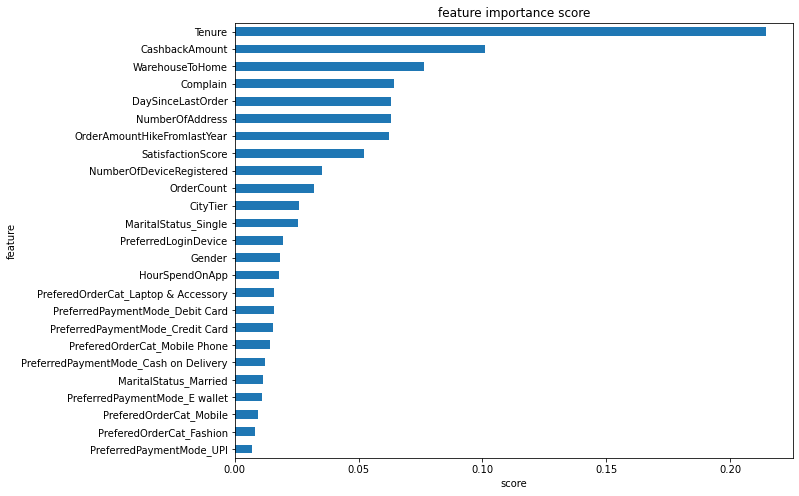

In [37]:
show_feature_importance(model)

Feature yang mempunyai pengaruh besar adalah:
- CashbackAmount
- Tenure
- WarehouseToHome
- DaySinceLastOrder
- Complain
- NumberOfAddress
- OrderAmountHikeFromlastYear
- SatisfactionScore
- NumberOfDeviceRegistered
- OrderCount
- CityTier
- MaritalStatus_Single

Melihat dari feature-feature yang penting diatas dapat ditarik kesimpulan bahwa, untuk mencegah terjadinya customer churn, pelanggan butuh diberikan Cashback yang cukup besar sampai setidaknya 10 bulan (10 bulan disini merupakan median dimana customer diprediksi tidak churn, customer diprediksi churn jika tenure dibawah 1 bulan). Hal ini dapat kita tarik sebagai kesimpulan karena terlihat CashbackAmount dan Tenure merupakan feature yang paling berpengaruh pada churn customer. Selain itu jumlah warehouse juga perlu diperbanyak di tempat yang memiliki banyak customer, karena warehouse yang terlalu jauh menyebabkan customer churn. Dan yang terakhir adalah harus menjaga DaySinceLastOrder yang stabil, jika customer terlalu sering atau terlalu jarang menggunakan Ecommerce ini, maka customer tersebut akan berpotensi churn karena itulah customer perlu diberikan voucher mingguan yang membuat belanja mereka teratur setiap minggunya.

# Feature Selection berdasarkan feature yang terpenting

In [38]:
features = ['CashbackAmount',
'Tenure',
'WarehouseToHome',
'DaySinceLastOrder',
'Complain',
'NumberOfAddress',
'OrderAmountHikeFromlastYear',
'SatisfactionScore',
'NumberOfDeviceRegistered',
'OrderCount',
'CityTier',
'MaritalStatus_Single']

In [39]:
X_train_selection = X_train[features]
X_test_selection = X_test[features]

## Dengan hyperparameter sebelumnya

In [40]:
model = RandomForestClassifier(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state = 42)
model.fit(X_train_selection, y_train )
ypred = model.predict(X_test_selection)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.8876404494382022
ROC_AUC Score = 0.9399313358302123


## Mencari Hyperparameter baru

In [42]:
print(f'Random Forest:')
RSCV = RandomizedSearchCV(RandomForestClassifier(random_state = 42), params[3], cv = 3, n_jobs = -1, verbose = 0, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = 10)
RSCV.fit(X_train_selection, y_train)
y_pred = RSCV.predict(X_test_selection)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Random Forest:
Recall Score = 0.8764044943820225
ROC_AUC Score = 0.9332022471910112


In [138]:
RSCV.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

Feature selection menurunkan score model karena feature yang ada sebelumnya sudah sedikit namun feature selection membuatnya menjadi lebih sedikit lagi. Feature-feature yang masih mempunyai pengaruh walaupun tidak banyak menjadi hilang, karena itulah score model menjadi menurun